In [128]:
import pandas as pd

In [129]:
df = pd.read_csv('Apple_Historical_StockPrice2.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,26.500000,26.547501,26.264999,26.297501,24.459534,77645600
1,2016-03-29,26.222500,26.947500,26.219999,26.920000,25.038527,124760400
2,2016-03-30,27.162500,27.605000,27.150000,27.389999,25.475679,182404400
3,2016-03-31,27.430000,27.475000,27.219999,27.247499,25.343138,103553600
4,2016-04-01,27.195000,27.500000,27.049999,27.497499,25.575666,103496000
5,2016-04-04,27.605000,28.047501,27.567499,27.780001,25.838421,149424800
6,2016-04-05,27.377501,27.682501,27.355000,27.452499,25.533810,106314800
7,2016-04-06,27.557501,27.745001,27.299999,27.740000,25.801216,105616400
8,2016-04-07,27.487499,27.605000,27.030001,27.135000,25.238501,127207600
9,2016-04-08,27.227501,27.442499,27.042500,27.165001,25.266407,94326800


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [131]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,56.476635,57.098048,55.860792,56.506099,55.358836,1.300474e+08
std,29.961638,30.397301,29.417572,29.916321,30.393892,5.867030e+07
min,22.500000,22.917500,22.367500,22.584999,21.134403,4.544800e+07
25%,37.451875,37.845625,37.139377,37.518126,35.840332,9.116405e+07
50%,46.306250,46.798750,45.942501,46.370001,44.998276,1.138023e+08
75%,66.016253,66.891874,65.626249,66.459377,65.805641,1.505391e+08
max,143.600006,145.089996,141.369995,143.160004,142.946396,4.584084e+08


In [132]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

df.set_index(['Date'])
df.sort_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,26.5000,26.547501,26.264999,26.297501,24.459534,77645600
1,2016-03-29,26.2225,26.947500,26.219999,26.920000,25.038527,124760400
2,2016-03-30,27.1625,27.605000,27.150000,27.389999,25.475679,182404400
3,2016-03-31,27.4300,27.475000,27.219999,27.247499,25.343138,103553600
4,2016-04-01,27.1950,27.500000,27.049999,27.497499,25.575666,103496000


In [143]:
df['Year'] = df['Date'].map(lambda ts: ts.year)
df['Month'] = df['Date'].map(lambda ts: ts.month)
df['Week'] = df['Date'].map(lambda ts: ts.week)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Week
0,2016-03-28,26.5000,26.547501,26.264999,26.297501,24.459534,77645600,2016,3,13
1,2016-03-29,26.2225,26.947500,26.219999,26.920000,25.038527,124760400,2016,3,13
2,2016-03-30,27.1625,27.605000,27.150000,27.389999,25.475679,182404400,2016,3,13
3,2016-03-31,27.4300,27.475000,27.219999,27.247499,25.343138,103553600,2016,3,13
4,2016-04-01,27.1950,27.500000,27.049999,27.497499,25.575666,103496000,2016,4,13


In [152]:
df_week = df.groupby(['Year', 'Week']).agg({'Volume': 'sum', 'High': 'mean'})
df_month = df.groupby(['Year', 'Month']).agg({'Volume': 'sum', 'High': 'mean'})

In [153]:
df_week.head()

Volume     High
Year Week                     
2016 13     591860000  27.2150
     14     582890400  27.7045
     15     649240000  27.9070
     16     756212000  26.9225
     17    1397696400  25.1130

In [154]:
df_month.head()

Volume       High
Year Month                       
2016 3       488364000  27.143750
     4      3489534800  26.939762
     5      3602686000  23.923690
     6      3117990800  24.369432
     7      2743118400  24.791000

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)

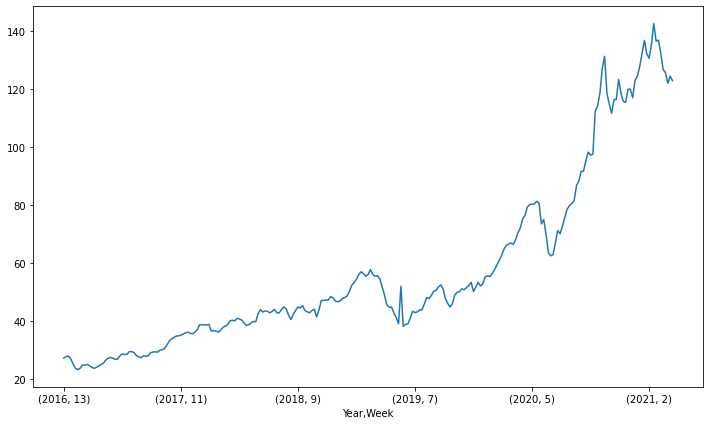

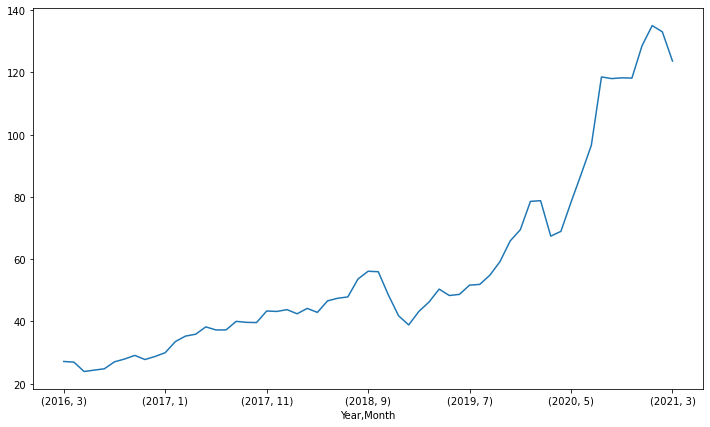

In [157]:
df_week['High'].plot()
plt.show()
df_month['High'].plot()
plt.show()

In [167]:
df = df_week
df.describe()

,Volume,High
count,2.610000e+02,261.000000
mean,6.278150e+08,57.192955
std,2.342381e+08,30.463643
min,2.631020e+08,23.268000
25%,4.636852e+08,38.221500
50%,5.855556e+08,46.862500
75%,7.456620e+08,66.848751
max,1.620264e+09,142.484003


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 261 entries, (2016, 13) to (2021, 12)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Volume  261 non-null    int64  
 1   High    261 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.2 KB


In [161]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

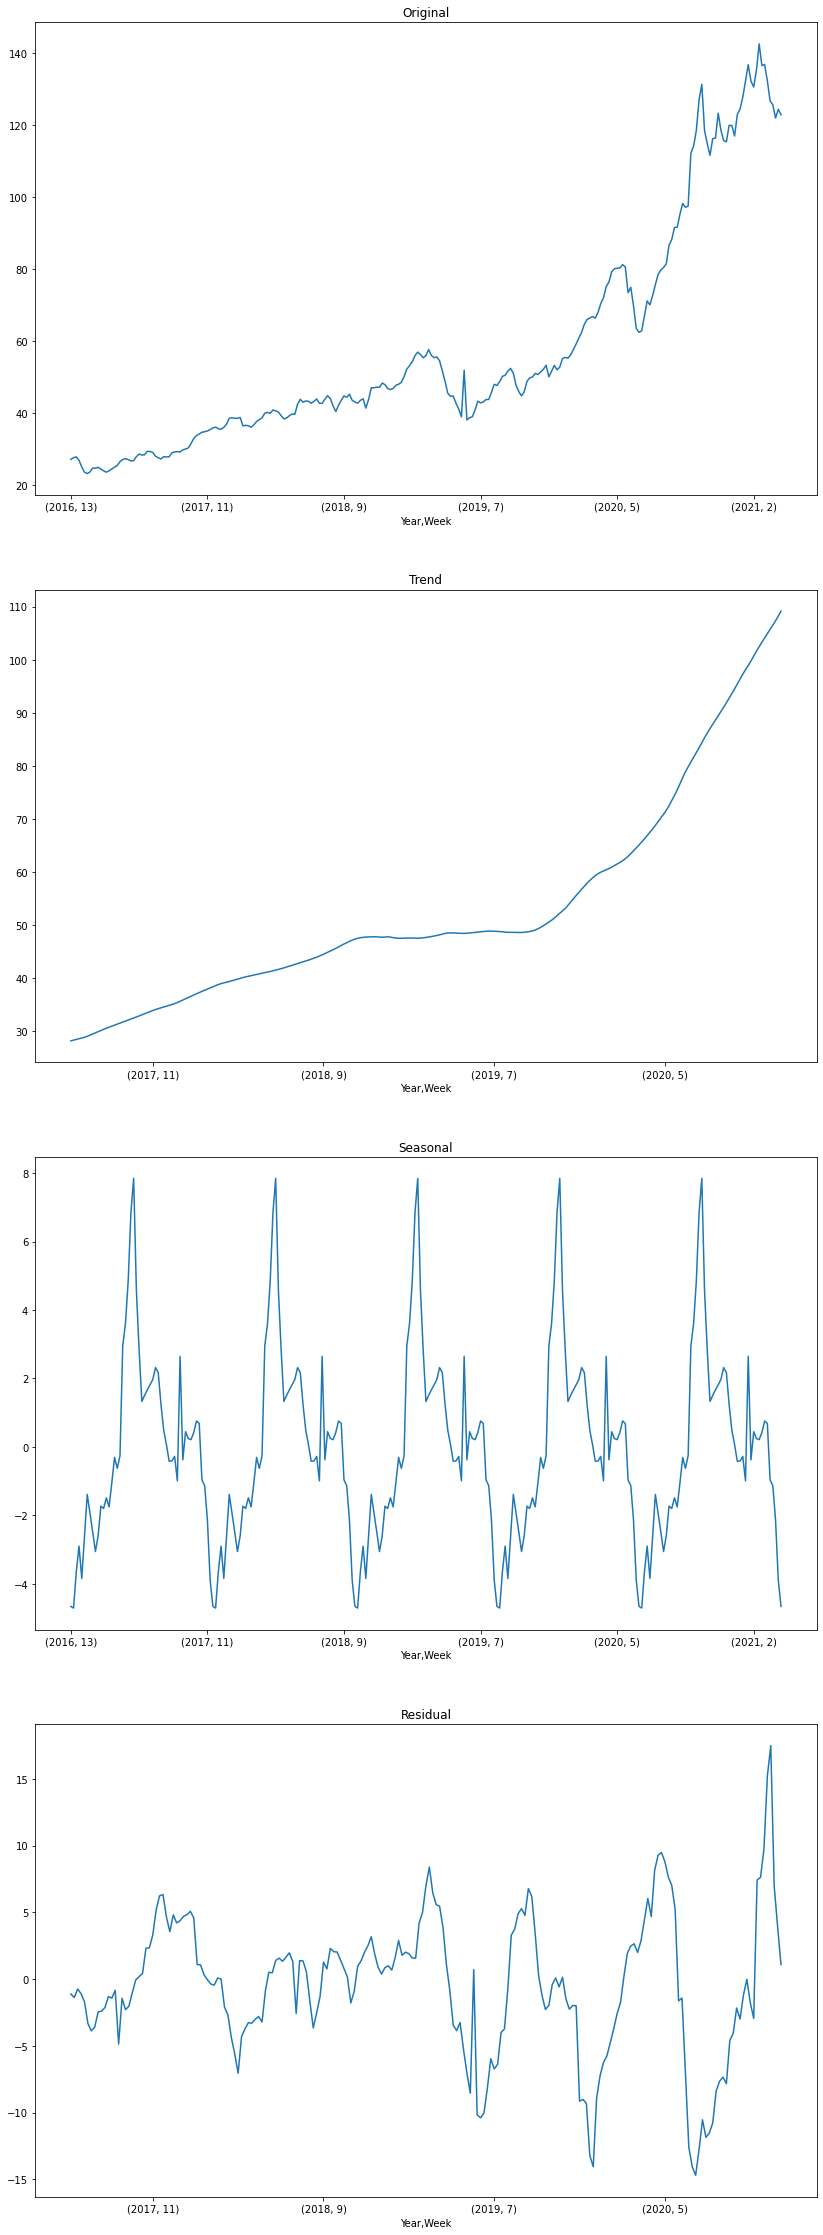

In [164]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df[['High']], period=52)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3])
plt.show()

In [169]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [166]:
acf(df['High'], nlags=8, fft=False)

array([1.        , 0.98539139, 0.97003038, 0.95493847, 0.93839083,
       0.9204516 , 0.90143737, 0.88079814, 0.85960255])

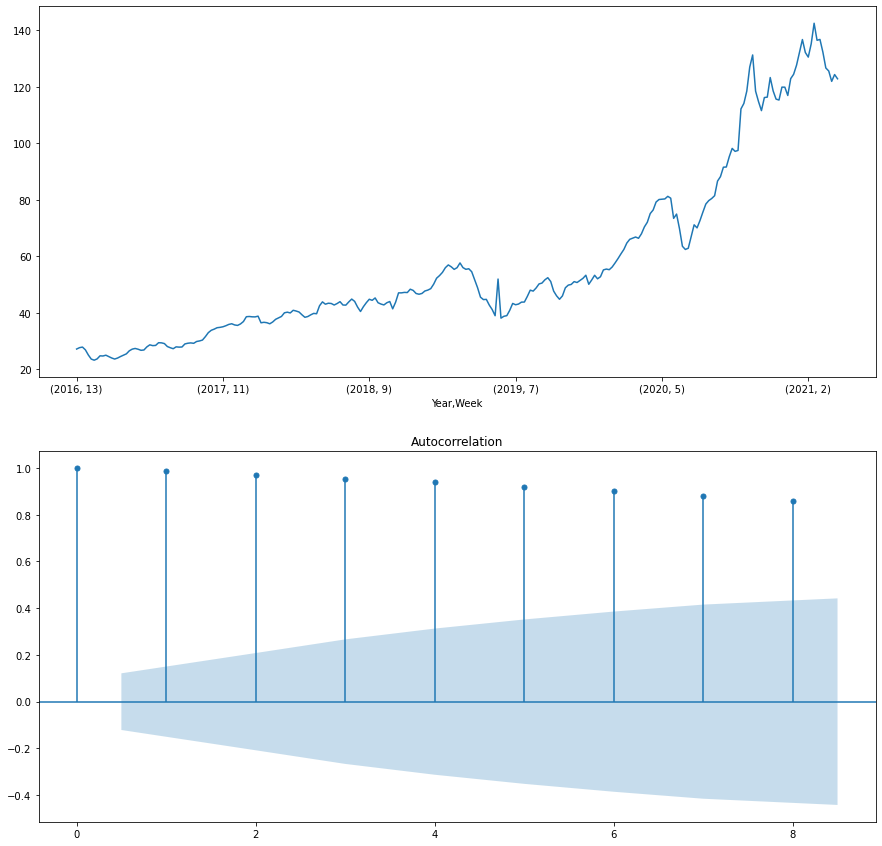

In [170]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
df['High'].plot(ax=ax[0])
plot_acf(df['High'], lags=8, ax=ax[1])
plt.show()

In [171]:
from statsmodels.tsa.stattools import adfuller